# Introduction to Machine Learning

This Notebook is designed to give students a general feel for how machine learning works. This will be done through a couple of steps:
1. Defining Machine Learing
2. Outlining the general types of Machine Learning algorithms/approaches
3. Implementing a single-layer and a multi-layer Nueral Network via `scikit-learn`
4. Implementing a MLP to classify numbers

# Defining Machine Learning
"**Definition:** A computer program is said to **learn** from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$"<br>
> *Machine Learning* by Tom M. Michell

"Machine learning can be broadly defined as computational methods using experience to improve performance or to make accurate predictions."
> *Foundations of Machine Learning* by Mehryar Mohri, Afshin Rostamizadeh, and Ameet Talwalkar

Many methods that we don't recognize are Machine Learning (ML) algorithms, are. For example, if you've ever used a Markov Chain Monte Carlo (MCMC) algorithm to solve an integral or a Particle Swarm Optimization (PSO) to minimize an equation you've used ML. Most algorithms that do clustering and predict probability density functions are machine learning algorithms. ML is often described as 'data driven algorithms.' Along this concept, anything that scours databases for information or patterns, often called data mining, are ML algorithms to some extent.

# Types of Machine Learning Algorithms
As you can already tell, ML covers a vast section of algorithms. Let's take a look at a couple different types of ways of organizing them.
## Standard Learning Tasks
We can organize algorithms by what they are trying to do:
- *Classification*: Trying to discover a mapping of some function $f: \vec{v} \to C$, where $\vec{v}$ is a vector of input values and $C$ is the collection of classes we are trying classify into. There is a difficult discussion that be had around the concepts of black-box models vs. white-box models, understandability of models, interpretability, verifyability, etc. 
- *Regression*: Trying to predict a real valued (there are extension that include imaginary values and higher order tensors) from the input characterisitics; $f: \vec{v} \to \mathbb{R}$.
- *Ranking*: Trying to learn how to order items according to some criterion.
- *Clustering*: Trying to find logical groups in the data.
- *Dimensionality reduction* or *Manifold Learning*: Trying to transform a higher-dimensional input vector into a lower-dimensional space or one with preferable characteristics.

## Learning Scenarios
Often we classify algorithms about the type of information that is fed to it:
- *Supervised Learning$^\dagger$*: The data fed to the algorithm is fully labeled with the respective classes or real valued output.
- *Unsupervised Learning$^\dagger$*: The data fed to the algorithm is completely unlabeled. This results usually running "algorithms" to find patterns instead of running programs to generate "models."
- *Semi-supervised Learning*: Some of the data is labeled, but not all of it. This usually has iterative steps of training a Supervised Learning model off the labeled data, guessing labels for the unlabeled points, then training a model from the newly labeled points. (Thanks to work initially done by Dempster, this is shown to converge under specific criteria.)
- *Reinforcement$^\dagger$*: To collect data, the agent interacts with the environment.
- *Transductive Inference*: A special case of Semi-supervised Learning where the objective is only to label the given points, without regards to generalizability of the model.
- *On-line Learning*: Data is collected in iterations of tarining and testing phases. This gives models that improves as they are used.
- *Active Learning*: Data is collected in collaboration with an oracle/teacher to answer requests for new data points for the algorithm. 

$^\dagger$ These are often the only three that are referred to, and the others can be described with respect to them.

## Purpose
When you want to apply a ML program, these concepts can help educate you on what ML algorithm to choose. Think about what the objective you want to solve in your program? What data do you have to provide? How well does it need to generalize? How understandable does the model need to be? Are you limited in the amount of time or computational resources?

If you are interested in applying ML, I would urge you to take a glance through Google's free training on ML. Specifically, they outline the thoughts that go on behind properly framing the question: [Machine Learning: Problem Framing (Google)](https://developers.google.com/machine-learning/problem-framing)

Okay, that's enough of being pedantic and defining what Machine Learning is. How about we look at one of the hottest ML algorithm, the Neural Network?

# Building ML Programs

There is no reason to reinvent the wheel, so let's use Scikit Learn

    pip install sklearn


In [2]:
import numpy as np #as always
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier #this brings in the Multi-Level Perceptron Classificer for us to use

We will be using the Multi-Level Perceptron. The structure of the object works as an iterative nesting of a collection of linear functions.

## Perceptron
The original perceptron construction, what we might call a single-layer feed-forward neural-network or a linear neural-network, tries to learn the parameters for the function 
$$f(x; \theta) = \mathbb{I}(w^T x +b \geq 0) = H(w^T x + b)$$
where $w$ is some learned weight function, $H$ is the Heavyside function. In many applicatioins, this *activation function* is replaced by functions such as RELU and the Sigmoid function. In the original Perceptron was designed by Rosenblatt in 1958, and later the *Perceptrons* book by Minsky and Papert in 1969 was proven to be only able to learn linear functions. If we chain these functions together, however, we can start deriving a nonlinear problem.
$$f(x) = f_4 \circ f_3 \circ f_2 \circ f_1(x) = f_4(f_3(f_2(f_1(x))))$$

This is an identical formalization using the illustration of fig. 1.
![Multi-Level Perceptron Illustration borrowed from https://www.ibm.com/cloud/learn/neural-networks ](data\ML_resources\images\neural_networks1.png)
*fig 1.* Multi-Level Perceptron Illustration borrowed from https://www.ibm.com/cloud/learn/neural-networks 

Each of the layers represents a function in the construction above, and the edge weights that are learned can be thought of as the elements that make up the weights $w$. Not pictured here, there is some defined activation function at all these weights and input vectors will be fed into. 

The construction of the MLP was as far as researchers got on this problem until around the 1980's. At this point it was unclear how to train these multi-layer networks. Today, the common approach used is the **Backpropagation** algorithm

## Pulling in data
Before we can start doing anythin fancy, we have to collect the data to use. For my own learning I like to use the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). I have selected two datasets for us to train our MLP's from. The first is a collection of Breast Cancer data, called the [Breat Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The second is the ... . Perceptrons require real-valued data points, and SciKit-Learn's MLP does not support missing data points (it is still an open research topic about the best way to handle missing data in Artificial Neural-Networks). 

I have taken the liberty to import the data and format it correctly, making sure all values are real valued and removing the few data-points with missing values.

In [3]:
def import_data(name="./data/ML_resources/breast_cancer_wisconsin/data.csv", training_percent=.80, delim = ','):
    data = np.genfromtxt(name, delimiter=delim)    #Let Numpy do the heavy lifting and process the data
    nan_locs = np.where(np.isnan(data) == True)    #Locate which rows have missing data
    data = np.delete(data, nan_locs, 0)    #Remove rows with missing data

    rng = np.random.default_rng()    #This is numpy's prefered Generator to do random methods
    
    rng.shuffle(data)    #Shuffle my data uniformly, so we can get a random sample
    training = data[0:int(data.shape[0] * training_percent), :]    #Generate a training set according to given proportion
    testing = data[int(data.shape[0] * training_percent)::, :]    #Generate a testing set according to what is not trained on
    return training, testing

You should notice that this function already divides out a training, and testing set. This is common practice, as we would like to know how good our model is performing. A common number to choose is 80%, but you will see later that we choose to run with 90% since our datasets are small and would like as much training as possible.

Next, let us initiate our MLPClassifier object.

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=tuple([5]*3), random_state=1, max_iter=1000)

- We have given the chosen a family of quasi-Newton methods for our differentiation method (`solver='lbfgs'`), according to the documentation this is good for small datasets.
- The code will stop running after 1000 iterations
- We have provided an $\alpha$, or learning rate, or $1 \times 10^{-5} = 0.00001$. This is a tunable hyperparameter.
- The construction has 3 hidden layers, or layers beyond the input and output layer, and each with 5 nodes. 
- I have provided the starting seed, random_state, to show how the starting position can effect the final model's performance.

At this point, we are ready to make the model.

In [5]:
train, test = import_data(training_percent=0.9)
features = train[:, 0:-1]
classes = train[:, -1]

clf.fit(features, classes)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5, 5), max_iter=1000,
              random_state=1, solver='lbfgs')

To test the the performance, we can run a collection of testing points through the model via the `score` method. This will return the percent that were classified correctly.

In [6]:
features_test = test[:, 0:-1]
classes_test = test[:, -1]

clf.score(features_test, classes_test)

1.0

That's some horrible performance. The performance is barely better than random (50%), or what we would call a weak learner. Let's try running a couple different hyperparameters to see if it was a specific contruction that caused our poor performance, or if it was the model chosen.

In [7]:
def MLP_test_bcw(trials, alpha=1e-5, layers=5, random_state=None, iterations=1000):
    results = []
    for i in range(trials):
        clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(layers, 2), random_state=random_state, max_iter=iterations)
        train, test = import_data(training_percent=0.9)
        clf.fit(train[:, 0:-1], train[:, -1])
        results.append(clf.score(test[:, 0:-1], test[:, -1]))
    return results

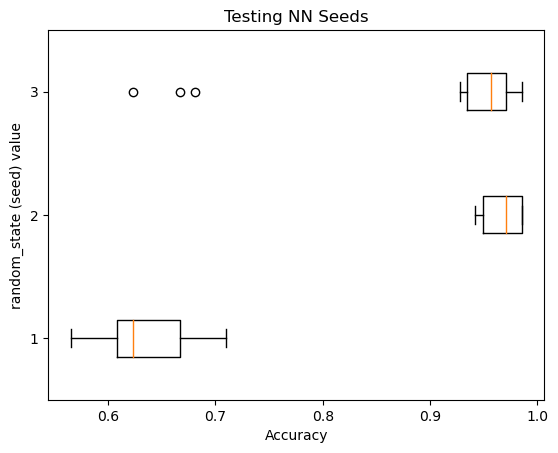

In [8]:
trial_1 = MLP_test_bcw(15, layers=5, random_state=1)
trial_2 = MLP_test_bcw(15, layers=5, random_state=2)
trial_3 = MLP_test_bcw(15, layers=5, random_state=3)
plt.boxplot([trial_1, trial_2, trial_3], vert=False, labels=['1', '2', '3'])
plt.title("Testing NN Seeds")
plt.xlabel('Accuracy')
plt.ylabel('random_state (seed) value')
plt.show()

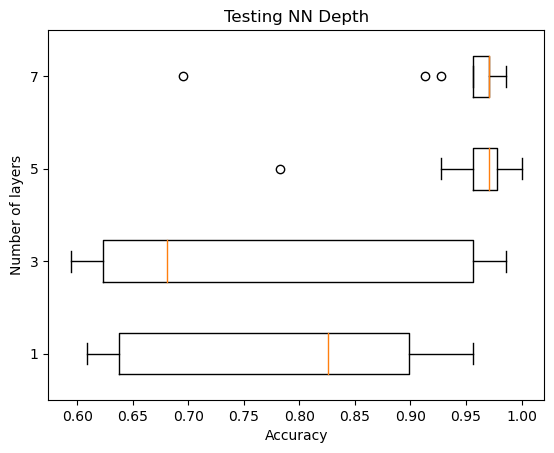

In [9]:
trial_1 = MLP_test_bcw(15, layers=1, random_state=3)
trial_2 = MLP_test_bcw(15, layers=3, random_state=3)
trial_3 = MLP_test_bcw(15, layers=5, random_state=3)
trial_4 = MLP_test_bcw(15, layers=7, random_state=3)

plt.boxplot([trial_1, trial_2, trial_3, trial_4], vert=False, labels=['1', '3', '5', '7'])
plt.title("Testing NN Depth")
plt.xlabel('Accuracy')
plt.ylabel('Number of layers')
plt.show()

C:\Users\willj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


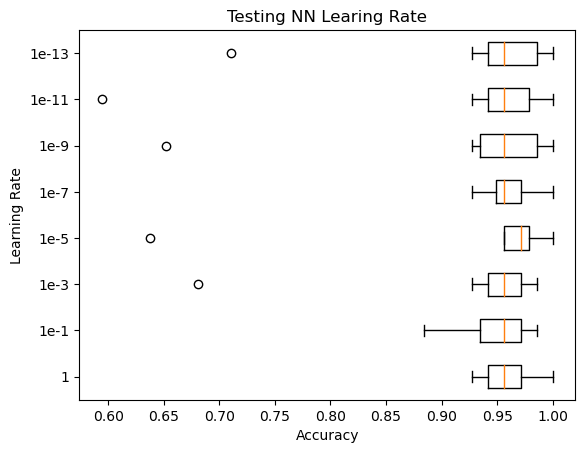

In [10]:
trial_1 = MLP_test_bcw(15, layers=5, alpha=1e-3, random_state=3)
trial_2 = MLP_test_bcw(15, layers=5, alpha=1e-5, random_state=3)
trial_3 = MLP_test_bcw(15, layers=5, alpha=1e-7, random_state=3)
trial_4 = MLP_test_bcw(15, layers=5, alpha=1e-9, random_state=3)
trial_5 = MLP_test_bcw(15, layers=5, alpha=1e-11, random_state=3)
trial_6 = MLP_test_bcw(15, layers=5, alpha=1e-1, random_state=3)
trial_7 = MLP_test_bcw(15, layers=5, alpha=1, random_state=3)
trial_8 = MLP_test_bcw(15, layers=5, alpha=1e-13, random_state=3)

plt.boxplot([trial_7, trial_6, trial_1, trial_2, trial_3, trial_4, trial_5, trial_8], vert=False, 
            labels=['1', '1e-1', '1e-3', '1e-5', '1e-7', '1e-9', '1e-11','1e-13'])
plt.title("Testing NN Learing Rate")
plt.xlabel('Accuracy')
plt.ylabel('Learning Rate')
plt.show()

# Now it is your turn

We are processing a document so that the numbers are read automatically. Our original file is this passport (you might recognize it from the game *Papers, Please*).

![Image to take numbers from. Screen catured from Papers Please](data\ML_resources\images\passport.png)

I have gone ahead and grabbed all the numbers to be processed. They look something like

![The number 3](data\ML_resources\objective\3_1.png)
![The number 3](data\ML_resources\objective\3_2.png)
![The number 4](data\ML_resources\objective\4_0.png)

We will be training our data with a handwritten numbers set from [UCI database](https://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit). Download the data `semeion.data` file from the `data folder`. Move it into `intro_python_seminar\notebooks\data\semion\`. I prefer to name all my data files `data.csv` and deliminate which dataset I am in by the name of the folder for better organization and the ability to automate trials.

### Import the data
It is time to import the data. These 16x16 images are 276 element long arrays: (256 image elements, 10 elements one-hot encoded vector). One-hot encoding a vector is when you transform a categorical variable into a Boolean vector, where the appropriate element is `1` if it is that class, and `0` for all other classes. For example, if we one-hot encoded the set $\{1,2,3\}$, we get 
$$1 \rightarrow [1,0,0]$$
$$2 \rightarrow [0,1,0]$$
$$3 \rightarrow [0,0,1]$$
So, when we pass our train set, we will need to omit the last 10 elements, something like:
>```train[:, :-10], train[:, -10::]```

**Q1: Download the dataset from the UCI and import the data, using the same method we used before; I would adivse that you save the data into a `train` and `test` matrix like before. (If you are having trouble getting the data, I have left a copy of the csv named `backup_data.csv` in the appropriate folder.)**

In [11]:
train, test = import_data("./data/ML_resources/semeion/backup_data.csv", training_percent=.90,delim = ' ')

### Building the model

**Q2: Build a new MLP object and place it into `number_model`. You should use the `solver='lbfgs'`, 7 layers with 100 nodes. We need to use the `lbfgs` solver because otherwise our model will not start to converge because of our dataset size. If you are having trouble with runtime, try reducing to 2 layers with 100 nodes.**

In [12]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=tuple([100]*7), max_iter=200)

**Q3: Train your model with the training set created in Q1. Use the test set defined in Q1 to get a score for your model. If you did everything correctly you should have a score around $.80-.90$**

In [13]:
clf1.fit(train[:,:-10], train[:,-10:])
clf1.score(test[:,:-10], test[:,-10:])

0.9125

### Classifying Numbers
We are now ready to try to classify our numbers. The data needs to be pre-processed so that it is in the same format the data we trained our model on was. The function below reads in a given image and transforms it to an inverse, binary, greyscale vector image.

In [14]:
import matplotlib.image as img    #We are using matplotlib.image to import our images

def process_num(name, objective_folder = ".\\data\\ML_resources\\objective"):
    image = img.imread(objective_folder + "\\" + name)   #Read in the image
    image = np.sum(image, axis=2)**-1    #Invert greyscale - this is how our training data was
    image = image / image.max()    #Scale our files
    image = image.flatten().reshape([1, -1])    #Reshape for the next step
    image = np.array([0 if x < np.median(image) else 1 for x in image[0]]).reshape(1,-1)    #Transform to boolean with respect to median
    return image

**Q4: Read in `1_1.png` and using the `.predict` method from our model to classify our image. Assuming our model is behaving well, we should get something like:**
>`array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])`

**If you did not get a vector like that out, try rerunning Q3, it might be a bad seed. However, if it does not after trying two different seed, chances are there is a bug in your code or you need a larger network (perhaps you need a larger training proportion?).**

In [15]:
num_1 = process_num("1_1.png")
clf1.predict(num_1)
#hmmmm, that's not array([0,1,0,0,0,0,0,0,0]) -> 1 looks like a 7.

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

**Q5: If we run `predict` on other number (try `2_0.png`) we might get**
>`array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])`

**because there is no adequately large "hit." The solution is getting out the final activation of nodes, or the probability distribution of what the solution is. Get the `predict_proba` or `predict_log_proba` for `1_1.png`. Normalize this result using `np.linalg.norm`. This might look like**

```
pred = model.predict_proba(1_1_data)
pred = pred / np.linalg.norm(pred)
```

**Run your code on one or two of the other images to make sure it gives you a resonable result.**

In [16]:
num_1 = process_num("2_0.png")
pred = clf1.predict_proba(num_1)
pred = pred/np.linalg.norm(pred)
pred = [x if x > 1e-4 else 0 for x in pred[0]]
# pred
pred

[0, 0.9999999998573772, 0, 0, 0, 0, 0, 0, 0, 0]

**Q6: Write a short function that takes in the name of an image, then returns a vector of normalized probability of what number it is. Run this function on all the images in the `data\ML_resources\objective` folder.**

*Hint: if your results seem off, take a look down at Q7 before you start stressing.*

In [17]:
def prob_dist(num):
    num_1 = process_num(num)
    pred = clf1.predict_proba(num_1)
    pred = pred/np.linalg.norm(pred)
    pred = [x if x > 1e-2 else 0 for x in pred[0]]
    return pred

In [18]:
name = {'1_0.png':1, '1_1.png':1, '1_2.png':1, '2_0.png':2, 
        '2_1.png':2, '3_0.png':3, '3_1.png':3, '3_2.png':3, 
        '4_0.png':4, '5_0.png':5, '9_0.png':9}
for i in name.keys():
    print("The number %d has the distribution: " %name[i] + str([float('%.2f'%x) for x in prob_dist(i)]))

The number 1 has the distribution: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
The number 1 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 1 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 2 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 2 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 3 has the distribution: [0.0, 0.0, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28]
The number 3 has the distribution: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 3 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 4 has the distribution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The number 5 has the distribution: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
The number 9 has the distribution: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


**Q7: From Q6, you should be seeing some incorrect answers. For example, I got that `1_0.png` is most likely 0, 8, or 9, not 1. For the numbers that are far off, refer to the table below and come up with some reasons that they might have been classified wrong.**

The method that we have imployed here is a very naive one. In order to start getting accurate results, we would want to do use data that more closely reflects our problem (such as full greyscale, larger dataset, training on computer rendered images), and/or use a more sophisticated model. If you are interested in this, you might be interested in reading up on Convolutional Neural Networks (My own research is likely going to be in CNNs on Hyperspectral image data).

|File|Image|
|---:|:--:|
|`1_0.png`|![The number 1](data\ML_resources\objective\1_0.png)|
|`1_1.png`|![The number 1](data\ML_resources\objective\1_1.png)|
|`1_2.png`|![The number 1](data\ML_resources\objective\1_2.png)|
|`2_0.png`|![The number 2](data\ML_resources\objective\2_0.png)|
|`2_1.png`|![The number 2](data\ML_resources\objective\2_1.png)|
|`3_0.png`|![The number 3](data\ML_resources\objective\3_0.png)|
|`3_1.png`|![The number 3](data\ML_resources\objective\3_1.png)|
|`3_2.png`|![The number 3](data\ML_resources\objective\3_2.png)|
|`4_0.png`|![The number 4](data\ML_resources\objective\4_0.png)|
|`5_0.png`|![The number 5](data\ML_resources\objective\5_0.png)|
|`9_0.png`|![The number 9](data\ML_resources\objective\9_0.png)|

# Resources
I said in passing that I would add some resources if individuals were interested in looking into Machine Learning more; so here they are.

## Fun Toys:
- [TensorFlow Neural Network Playground](https://hplayground.tensorflow.org/)

## General Reference:
These references are good for to quickly search what terms might mean:
- [Google's Machine Learning Glossary](https://developers.google.com/machine-learning/glossary/](https://developers.google.com/machine-learning/glossary/)
- [Towards Data Science](https://towardsdatascience.com)
- [AI Roadmap](https://i.am.ai/roadmap)

## "Plug-and-Play" Libraries:
- [Pytorch](https://pytorch.org/)
- [TensorFlow](https://www.tensorflow.org/)
- [SciKit Learn](https://scikit-learn.org/stable/index.html)

## Books:
If you want a more complete understanding, here are a couple of the books that I am currently reading and use as references.
- [Machine Learning by Tom M. Mitchel](https://www.goodreads.com/book/show/55617816-machine-learning-by-tom-m-mitchell-mcgraw-hill-education?from_search=true&from_srp=true&qid=FTXGUZtpQQ&rank=1): Mitchel does a good job of bringing a low-level theoredical rigor to a non-theorist. I Personally really like his explanation of PAC-Learnability (chapter 7)
- [Probabalistic Machine Learning (book 1 and book 2 drafts) by Kevin Murphy](https://probml.github.io/pml-book/): Murphy wrote a previous book on Machine Learning that was very extensive, and he is currently rewritting all the knowledge he can collect into two large books. His previous book can currently be bought, but while the other two are under edits, they are availible for free download. They are great for referencing specific algorithms or finding algorithms to fill a certain task that you can dive into deeper.